# Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [3]:
audio_files = glob('audio_speech_actors_01-24/**/*.wav', recursive=True)

In [4]:
y, sr = librosa.load(audio_files[1])
print(f'y: {y[:10]}')
print(f'shaper y: {y.shape}')
print(f'sr is: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shaper y: (78724,)
sr is: 22050


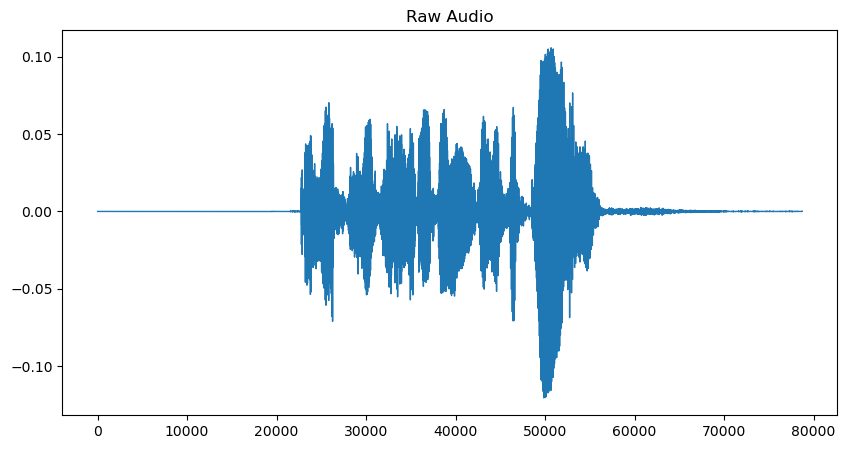

In [5]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Audio')
plt.show()

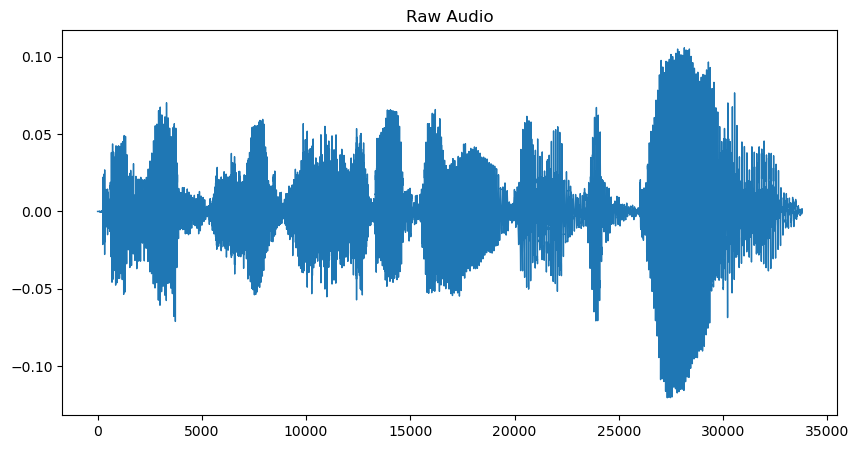

In [6]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw Audio')
plt.show()

In [7]:
d = librosa.stft(y)
s_db = librosa.amplitude_to_db(np.abs(d), ref=np.max)
s_db.shape

(1025, 154)

In [8]:
d = librosa.stft(y)
s_db = librosa.amplitude_to_db(np.abs(d), ref=np.max)
s_db.shape

(1025, 154)

In [9]:
s = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)*2
s_db_mel = librosa.amplitude_to_db(np.abs(s), ref=np.max)

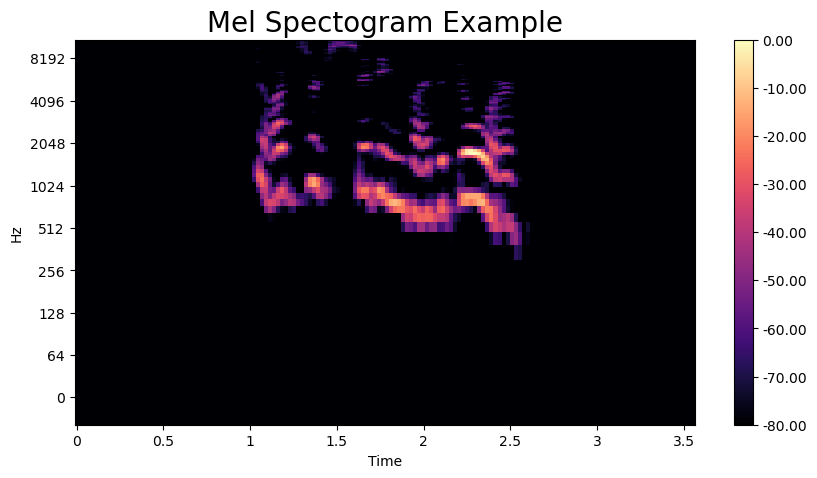

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(s_db_mel, 
                               x_axis='time', 
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

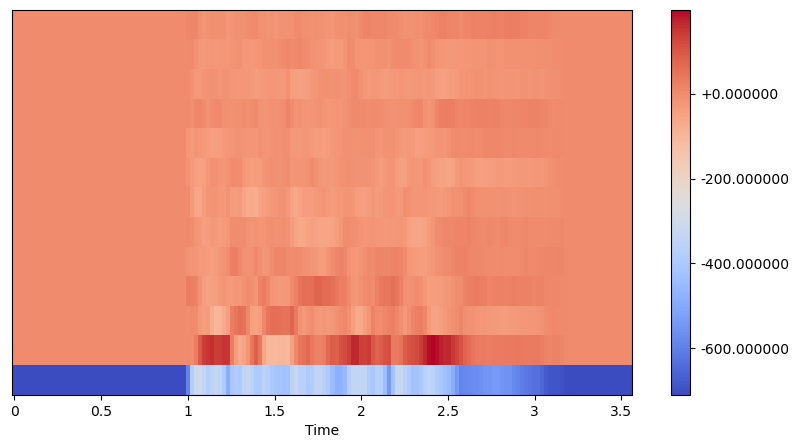

In [12]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs.shape

# Visualize MFCCs
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs,
                        x_axis="time",
                        sr=sr)
plt.colorbar(format="%+2f")
plt.show